# The basic units of Pandas are arrays:

## - Series is an one-dimensional arrary with axis labels.
## - DataFrame is a two-dimensional array with labeled axes (rows and columns)

- Numpy is the fundamental package for scientific computing with Python that provides an abundance of useful features for operations with high performance and enhanced speed of execution due to vectorization of mathemetics otherwise performed on scalers.

- The functionally of Pandas is built on top of NumPy and both libraries belong to the SciPy stack. Pandas allows more conveinent synax and interface handling dataframes.

Note: Pandas is optimized with smaller dataset (100MB ~ 1GB), and developers typically experience insufficient local memory and long runtime trying to run the module with significantly larger dataset. One solution is to leverage cloud/ distributed computing or computing cluster for higher scalability and fault tolerance.

Reference: Lee, Admond., *Why and How to Use Pandas with Large Data. But Not Big Data...*, **Towards Data Science**, Nov 03 2018, https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c

In [1]:
import pandas as pd
import numpy as np

#expand output display
pd.set_option('display.width', 700)
pd.set_option('display.max_columns', 13)

# 1. Data Ingestion

## 1.1 Load system data

Note: For comprehensive SQL commands, refer to https://www.w3schools.com/sql/sql_select.asp


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on May 30 2019

@author: Fiona Wang
"""
#If not already, use terminal to: pip install psycopg2
import psycopg2  
import pandas as pd  #after downloading pandas or work in environment with pandas
import pandas.io.sql as psql
import sys

def table_to_csv(sql, file_path, dbname, host, port, user, pwd):
    '''
    This function creates a csv file from PostgreSQL with query
    '''
    try:
        conn = psycopg2.connect(dbname=dbname, host=host, port=port,\
         user=user, password=pwd)
        print("Connecting to Database")
        # Get data into pandas dataframe
        df = pd.read_sql(sql, conn)
        # Write to csv file
        df.to_csv(file_path, encoding='utf-8', header = True,\
         doublequote = True, sep=',', index=False)
        print("CSV File has been created")
        conn.close()

    except Exception as e:
        print("Error: {}".format(str(e)))
        sys.exit(1)

# Execution Example with transaction table
sql = 'select * from schema_name.table_name order by column1, column2'  #write in your SQL code, with quotation marks
file_path = 'give your path where you want to store/created_table.csv'
dbname = 'xxxxxx' #Data base name
host = 'x.xxx.xxx.xxx'  #IP address
port = '5432'  #typically is 5432
user = 'xxxxxxx'
pwd = 'xxxxx'

'''
Command code to run the data loading into Pandas DataFrame:
----------------------------------------------------------
table_to_csv(sql, file_path, dbname, host, port, user, pwd)
'''

## 1.2 Load local data

### 1.2.1 load excel file, with/ -out sheet name

Read in file that resides in same repository as current working console, assign to self-defined dataframe (df) name.

If sheet name is not defined, the first tab will be loaded in by default.


In [2]:
df_rpt = pd.read_excel("credit_default_swap_rpt.xlsx",
                       sheet_name = 'sample data')

# syntax df.head(_) returns first _ rows of dataset
df_rpt.head(5)

,Credit Default Swaps / Index,Type,Sector,Industry,Details,duration,Download Data & View Chart,Data Since
0,Oji Holdings Corporation,CDS,Basic Materials,Containers & Packaging,Asia Investment Grade,1,Oji Holdings Corporation,2006
1,Oji Holdings Corporation,CDS,Basic Materials,Containers & Packaging,Asia Investment Grade,3,Oji Holdings Corporation,2006
2,Oji Holdings Corporation,CDS,Basic Materials,Containers & Packaging,Asia Investment Grade,5,Oji Holdings Corporation,2006
3,Oji Holdings Corporation,CDS,Basic Materials,Containers & Packaging,Asia Investment Grade,7,Oji Holdings Corporation,2006
4,Oji Holdings Corporation,CDS,Basic Materials,Containers & Packaging,Asia Investment Grade,10,Oji Holdings Corporation,2006


### 1.2.2 load CSV (comma separated textual file)


In [3]:
df_app = pd.read_csv("googleplaystore.csv")

# 2. Data Preprocessing and Cleansing


In [4]:
list(df_app)   #return a list of all columns
print("Originally there are", len(df_app['Last Updated']),"rows.")  #print original total row count

Originally there are 10841 rows.


In [5]:
df_app.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## 2.1 Drop column 

**syntax** options:
- new_df = df.drop(['column_name'], axis = 1)
- del df['column_name']

**axis**: {0 for 'index', 1 for 'columns' to be sorted}, default 0

In [6]:
#drop columns: Current Ver and size since it brings no value here
df_app = df_app.drop(['Current Ver'], axis = 1)

del df_app['Size']

## 2.2 Visualize column data types

In [7]:
df_app.dtypes    #display each column types

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Android Ver        object
dtype: object

## 2.3 Sort dataframe by columns a-/descendingly

**Syntax:** df.sort_values(by=['column1', 'column2',...], axis=0, ascending=True, inplace=False)


**axis**: {0 for 'index', 1 for 'columns' to be sorted}, default 0

**ascending**: bool or list of bool (if list must match with number of the 'by' columns, default *True*, otherwise sorted descendingly 

**inplace**: bool, default false; if True, perform operation in-place

In [8]:
#sort dataframe by column: Category then by column: Rating for optimization
df_app = df_app.sort_values(by=['Category','Rating'])

## 2.4 Change column data type

**Basic syntax directly overwrite**: df['column_name'] = pd.to_numeric(arg, errors='raise', downcast=None)

**arg**: list, tuple, 1-d array, or Series

**errors** : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

**downcast** : {‘integer’, ‘signed’, ‘unsigned’, ‘float’} , default None

    If not None, and if the data has been successfully cast to a numerical dtype 
    (or if the data was numeric to begin with), 
    downcast that resulting data to the smallest numerical dtype possible
    
---

example command below followed with .fillna(_) to set NaN to whatever argument placed in fillna function;

if downcast was not set in to_numeric function, can also be followed with .astype(_) for proper format

In [9]:
#coerce column: Reviews to integer, and exception becomes NaN
df_app['Reviews'] = pd.to_numeric(df_app['Reviews'], errors='coerce', downcast='integer').fillna(0)

#coerce column: Rating to float, and exception becomes NaN
df_app['Rating'] = pd.to_numeric(df_app['Rating'], errors='coerce').fillna(0).astype(float)


In [10]:
#returns range of review counts
min(df_app['Reviews']),max(df_app['Reviews'])

(0.0, 78158306.0)

## 2.5 Data filtering

**syntax** options:

- row by row indexing:

df = df.drop( df[ df['column_name'] disqualifying parameter check ].index) 


- apply operation:

qualifying1 = df['column1'] qualifying paramter check, 
      - e.g.  df['col1'] >= 1000

qualifying2 = df['column2'] qualifying paramter check, 
      - e.g.  df['col2'].str.contains('M')

new_df = df[qualifying1 & qualifying2]  
      - which assigns a dataframe with data qualified for both parameter bool


Note: & stands for ***and***; | stands for ***or***

In [11]:
#filter out any apps (rows) that have fewer than 1,000 reviews
df_app = df_app.drop(df_app[  df_app['Reviews'] < 1000 ].index) 


In [12]:
#filter out any apps (rows) that have <2.5 or > 5 as rating
atleast25 = df_app['Rating'] >= 2.5
atmost50 = df_app['Rating'] <= 5.0
df_app = df_app[atleast25 & atmost50]


In [13]:
print(df_app['Last Updated'][10473])   
#Find out the regular format for column: Last Updated from a random row at index 10473

print("Milestone 1, there are", len(df_app['Last Updated']),"rows.")  #total row count

August 7, 2018
Milestone 1, there are 5891 rows.


## 2.6 Self-defined functions to address unique issues (intermediate)

In [14]:
#let's change column: Last Updated to Date

#try run the conventional way   df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'], format='%Y%m%d')
#This will return TypeError because here our Last Updated date objects formatted ' month dd, yyyy ' is not recognized 


#You can write your own function in a separate file to address that:
%run usastring_to_datetime.ipynb

i = 0
date_updated = [0]*len(df_app['Last Updated'])
for each in df_app['Last Updated']:
    try:
        date_updated[i] = own_str_to_date(each)
        i+=1     
    except: 
        IndexError
        print(i, df_app['Last Updated'][i])
        df_app = df_app.drop(df_app.index[i])  #delete bad data row registered at 1.0.19
        df_app = df_app.reset_index()  #reset index for other possible sorting-related operations
        date_updated.pop(i)
        
        continue

print(len(df_app['Last Updated']))
df_app['Date Updated'] = date_updated

5891


In [15]:
print(df_app['Date Updated'][5:10], df_app['Last Updated'][5:10])
#check if the new column: Date Updated transcribes correctly against column: Last Updated

df_app.dtypes

33    2018-01-06
18    2018-08-03
8     2017-09-20
10    2017-10-27
11    2018-07-31
Name: Date Updated, dtype: object 33       January 6, 2018
18        August 3, 2018
8     September 20, 2017
10      October 27, 2017
11         July 31, 2018
Name: Last Updated, dtype: object


App                object
Category           object
Rating            float64
Reviews           float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Android Ver        object
Date Updated       object
dtype: object

In [16]:
#Now we are fine to drop the old column: Last Updated
df_app = df_app.drop(['Last Updated'], axis = 1)
df_app = df_app.reset_index()


df_app.tail(15)
#df_app.tail(15) returns bottom 50 rowsdf_app = df_app.reset_index()

,index,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver,Date Updated
5876,3660,New 2018 Weather App & Widget,WEATHER,4.5,2332.0,"500,000+",Free,0,Teen,Weather,4.1 and up,2018-08-03
5877,3661,Météociel,WEATHER,4.5,29344.0,"500,000+",Free,0,Everyone,Weather,4.1 and up,2018-07-25
5878,4133,Weather Live,WEATHER,4.5,76593.0,"500,000+",Paid,$5.99,Everyone,Weather,Varies with device,2017-11-21
5879,4955,MyRadar NOAA Weather Radar Ad Free,WEATHER,4.5,3005.0,"10,000+",Paid,$2.99,Everyone,Weather,4.0.3 and up,2018-08-04
5880,4962,Weather & Radar Pro - Ad-Free,WEATHER,4.5,25243.0,"100,000+",Paid,$2.99,Everyone,Weather,4.4 and up,2018-08-01
5881,4976,"WeatherClear - Ad-free Weather, Minute forecast",WEATHER,4.5,3252.0,"50,000+",Free,0,Everyone,Weather,4.1 and up,2017-06-25
5882,6063,RadarNow!,WEATHER,4.5,54090.0,"5,000,000+",Free,0,Everyone,Weather,4.0 and up,2018-02-28
5883,3638,Klara weather,WEATHER,4.6,36900.0,"500,000+",Free,0,Everyone,Weather,4.0 and up,2018-07-28
5884,3653,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,"1,000,000+",Free,0,Everyone,Weather,Varies with device,2018-06-12
5885,8153,WebCams,WEATHER,4.6,3963.0,"100,000+",Free,0,Everyone,Weather,4.2 and up,2018-07-17


## 2.7 Data header and content modification via string operations

Note: It is highly suggested to familiarize oneself with Pandas operations commonly used with text data, a significant portion of data science works in workplace and research.

Operations that should be included are:
    - s.str.lower()
    - s.str.upper()
    - s.str.len()
    - s.str.strip()
    - s.str.lstrip()
    - s.str.rstrip()
    - s.str.replace(' ', '_')
    - s.str.split('_', expand=True) follow with .get(0) or .str[0] for post-spliting column object indexed at 0
    - s.str.cat(sep=',', na_rep='-')
    
    and a lot others
    
**Source**: http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html


In [17]:
#we need to delete the $ sign from column: Price,
df_app['Price'] = df_app['Price'].str.replace('$', '')

#convert to numeric, 
df_app['Price'] = pd.to_numeric(df_app['Price'], errors='coerce').fillna(0).astype(float)

#and change column name to Price ($).
df_app.rename(columns = {'Price': 'Price ($)'}, inplace=True)

#returns range of price
print(min(df_app['Price ($)']), max(df_app['Price ($)']))

#filter out any apps (rows) that are > $ 20
df_app = df_app.drop(df_app[  df_app['Price ($)'] > 20 ].index) 

0.0 399.99


In [18]:
#WOW, APPS UP TO 400 BUCKS?!

In [19]:
df_app = df_app.reset_index()
df_app.tail(5)

,level_0,index,App,Category,Rating,Reviews,Installs,Type,Price ($),Content Rating,Genres,Android Ver,Date Updated
5880,5886,3631,weather - weather forecast,WEATHER,4.7,11118.0,"1,000,000+",Free,0.00,Everyone,Weather,4.0 and up,2018-04-26
5881,5887,7491,Fu*** Weather (Funny Weather),WEATHER,4.7,20001.0,"1,000,000+",Free,0.00,Mature 17+,Weather,Varies with device,2018-07-26
5882,5888,8912,Weather Forecast Pro,WEATHER,4.7,14051.0,"100,000+",Paid,3.99,Everyone,Weather,4.0 and up,2018-08-04
5883,5889,3627,Weather forecast,WEATHER,4.8,159455.0,"1,000,000+",Free,0.00,Everyone,Weather,4.4 and up,2018-05-08
5884,5890,3658,Weather Live Pro,WEATHER,4.8,17493.0,"100,000+",Paid,4.49,Everyone,Weather,4.4 and up,2018-04-20


# 3. Business Analytics, Statistics, Visualization, Modeling, and Skepticism





                                                                                    -- Think like a professional
                                                                
### Your imaginary stakeholders might be asking you, a recently promoted senior analyst:

---
Does App price affect consumer expectation? How?
        
Is expectation significantly different between App categories?
            
If there is, consumers purchasing what categories are less likely to be critical?
   
Can you create friendly visualization for management?"
   
---


### The quantified questions will be:
---
Is there statistically significant difference on review scores depending whether the App being paid or free?
    
If yes, present the distribution of review v.s. price, and find if correlation exists.
                
Is there statistically significant difference on review scores across App categories?
    
Attempt scatter plot, trendline, and variability R^2 when proper.

Assume independent controls for each question persona.


---

## 3.1 Statistics and Visuals


### To solve question 1:


#### Ho: u1-u2 = 0
Null hypothesis: there is no statistically significant difference on review scores depending whether the App being paid or free.

#### Ha: u1-u2 != 0
Alternative hypothesis: there is......

#### Significance level alpha = 0.05, 

If p-value is less than or equal to the set significance level, the data is considered statistically significant

### 3.1.1 Distribution Plotting

Basic/ common plotting options and when to use:

- Boxplot: depicting groups of numerical data through their quartiles and other statistical parameters

- Scatterplot: using Cartesian coordinates to display values for typically two variables for a set of data

- Histogram: an estimate of the probability distribution of a continuous quantitative variable

- Bar graph: presents grouped qualitative data with bar lengths proportional to the values that bars represent

- Line graph: to visualize the value of something over time


In [20]:
boxplot1 = df_app.boxplot('Rating', by='Type', figsize=(12,8))
boxplot1
# Because the boxplot displays a distribution of left-skew rather than Normal. 
# It might be better off to attempt Mann-Whitney-Wilcoxon (MWW) RankSum than Normal for more accurate assessment

**Method 1**: if we assume Normal distribution,

create pivot table on the population's App count, score mean, and score standard deviation depending on the Type.

### 3.1.2 pivot_table

**syntax**: pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

Create a spreadsheet-style pivot table as a DataFrame.

**data** : DataFrame

**values** : column to aggregate, optional

**index** : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list can contain any of the other types (except list). Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.
        
**columns** : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list can contain any of the other types (except list). Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.

**aggfunc** : function, list of functions, dict, default numpy.mean
        If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves) If dict is passed, the key is column to aggregate and value is function or list of functions
        
**fill_value** : scalar, default None
        Value to replace missing values with

**margins** : boolean, default False
        Add all row / columns (e.g. for subtotal / grand totals)

**dropna** : boolean, default True
        Do not include columns whose entries are all NaN

**margins_name** : string, default ‘All’
        Name of the row / column that will contain the totals when margins is True.

In [21]:

df_type_review = df_app[['Rating','Type','App']] #assign selected column contents to a new dataframe

df_type_review['Std'] = df_app['Rating']  
#create a new column to be used for grouped value, and duplicate all Rating values for standard deviation calculation

df_c = pd.pivot_table(df_type_review, values=['Rating','Std','App'], index=['Type'], 
                               aggfunc={'Rating':'mean', 'Std':np.std, 'App':'count'})

C:\Users\Fiona WXY\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
df_c

,App,Rating,Std
Type,,,
Free,5673,4.260550,0.336038
Paid,212,4.428774,0.247207


### 3.1.3 Z-Score, P-Value, and SciPy.Stats


By assuming Normal Distribution, and given both samples greater than 30, we can choose **one- or two-sided two sample z-test**. If we want to test hypothesis of if one being greater than the other, we would choose one-sided. Here, since no strong focus if on finding which one scores higher, it is okay to use two-sided.
<img src=http://www.stat.yale.edu/Courses/1997-98/101/zstat2.gif width="200">

z = ((Free App rating mean - Paid App rating mean) - 0) /sqrt(Free App Std^2/ Free App count + Paid App Std^2/ Paid App Count)

To call for a cell value in the pivot table df_c constructed, use **df_c[column name][row name]**

Import **Statistics** package from **SciPy** to calculate P-value using Z-score

In [23]:
z = (df_c['Rating']['Free'] - df_c['Rating']['Paid'] - 0) / ((df_c['Std']['Free']**2/df_c['App']['Free'] + df_c['Std']['Paid']**2/df_c['App']['Paid'])**(0.5))
print("z-critical value calculated to be around", round(z, 2))

# use SciPy statistics library to find p-values
from scipy import stats
p = stats.norm.cdf(z)
print("p-value calculated to be around", round(p, 6)) 

if p <= 0.05:
    print("We reject the null hypothesis thus conclude that there is significant difference on review scores between Free and Paid App types at significance level 0.05.")
else:
    print("We cannot reject the null hypothesis, concluding there isnt't significant difference on review scores between Free and Paid App types at 0.05 significance level.")


z-critical value calculated to be around -9.58
p-value calculated to be around 0.0
We reject the null hypothesis thus conclude that there is significant difference on review scores between Free and Paid App types at significance level 0.05.


#### Since there is signifiant difference of review given paid or not, it is worth investigating the distribution of score from price.

### 3.2.1 Scatter Plot for Granularity

Notice syntax for command lines below, including from Pandas library
- DataFrame.plot.scatter(x='column of independent variable', 
                     y='column of dependent variable', 
                     c=select_from_color_schema, 
                     title='title name')
- PlotObject.set_xlim(starting_value, end_value)
- PlotObject.set_ylim(starting_value, end_value)
- PlotObject.set_xlabel('x-axis name')
- PlotObject.set_ylabel('y-axis name')

A handy and feature-wise comprehensive tool is library **Matplotlib** package **PyPlot**
- plt.show()

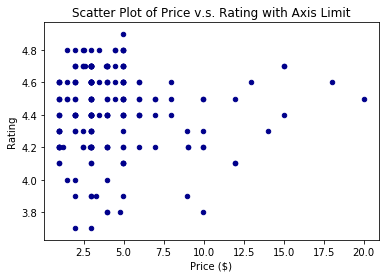

In [24]:
# To generate a fitted log model and visual, x values (price here) must be greater than 0 since log0 is invalid
df_app_model = df_app.drop(df_app[  df_app['Type'] == 'Free' ].index)

# Generate a scatter plot
import matplotlib.pyplot as plt


scplot = df_app_model.plot.scatter(x='Price ($)',
                                y='Rating',
                                c='DarkBlue', 
                                title='Scatter Plot of Price v.s. Rating with Axis Limit',
                                )

# Add axis labels
#scplot.set_xlim(0.1,20)
#scplot.set_ylim(2,5)

scplot.set_xlabel('Price ($)')
scplot.set_ylabel('Rating')


plt.show()



### 3.3.1 Data Modeling

A brief introduction to fitting functions from **NumPy**, including
- polynomial fitting, e.g. **np.polyfit(x, y, degree_of_freedom)**
- logarithm, e.g. **np.log(_)**
- polynomial class, e.g. **np.poly1d(PolyFitObject)**
- ploting the fitted line on top of raw scatter plot

Data modeling is where data analysts and scientists really want to ponder on 
- how sufficient evidence is for exclusive variable relations
- if it truly makes sense to attempt formulaic relation fitting, or prediction
- weigh on the opportunity cost of conducting strenuous data modeling and if the outcome can be translated into tangible values
- what statement or conclusion can be abstracted in the end

The fitted logarithm gives y = 0.013 log(x) + 4.413


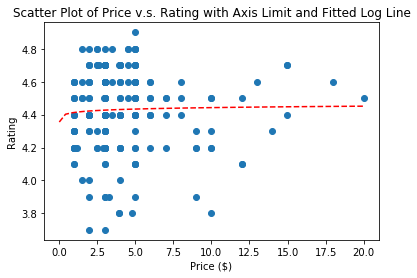

In [25]:

x = df_app_model['Price ($)']
y = df_app_model['Rating']
z = np.polyfit(np.log(x), y, 1)   #observation implies logarithmic relations. NLR is an overkill here.
print("The fitted logarithm gives y =",round(z[0],3),"log(x) +",round(z[1],3))
p = np.poly1d(z)


X = np.linspace(0.01,20) #we cannot start with 0 for log0 is invalid
x = df_app_model['Price ($)']
y = df_app_model['Rating']


fig, ax = plt.subplots()

ax.plot(x, y, 'o')
ax.plot(X, z[0]*np.log(X)+z[1], "r--")
        
plt.title('Scatter Plot of Price v.s. Rating with Axis Limit and Fitted Log Line')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
# notice semantic differences due to using matplotlib.pyplot as plt,
# versus previously pandas package on plotting accessories.
plt.show()

### 3.4.1 RankSum Test for Non-Normal Dist. 

A RankSum test will provide a P value indicating whether or not the two population distributions are statistically the same.

It is another method that can be directly derived from **Statistics** package that we imported

In [26]:
#Method 2: RankSum test
# select two treatment data sets from the df_app data  
treatment1 = df_app[df_app["Type"] == "Free"]["Rating"]  
treatment2 = df_app[df_app["Type"] == "Paid"]["Rating"]

In [27]:
z_stat, p_val = stats.ranksums(treatment1, treatment2)  
  
print("MWW RankSum P for treatments 1 and 2 =", p_val)  

if p_val <= 0.05:
    print("We reject the null hypothesis thus conclude that there is significant difference on review scores between Free and Paid App types at significance level 0.05.")
else:
    print("We cannot reject the null hypothesis, concluding there isnt't significant difference on review scores between Free and Paid App types at 0.05 significance level.")


MWW RankSum P for treatments 1 and 2 = 3.431419030322484e-14
We reject the null hypothesis thus conclude that there is significant difference on review scores between Free and Paid App types at significance level 0.05.



With P <= 0.05, we are highly confident that the distributions significantly differ, 
and can claim that the treatments had a significant impact on the measured value. 

With more confidence -- Answer to question 1: on a macro level, being paid or free can affect consumer review.

### 3.5.1 Data Visuals with Multiple Categories, One-Way ANOVA

To solve question 2, We can start with visualizing the boxplot for rating distribution grouped by categories.



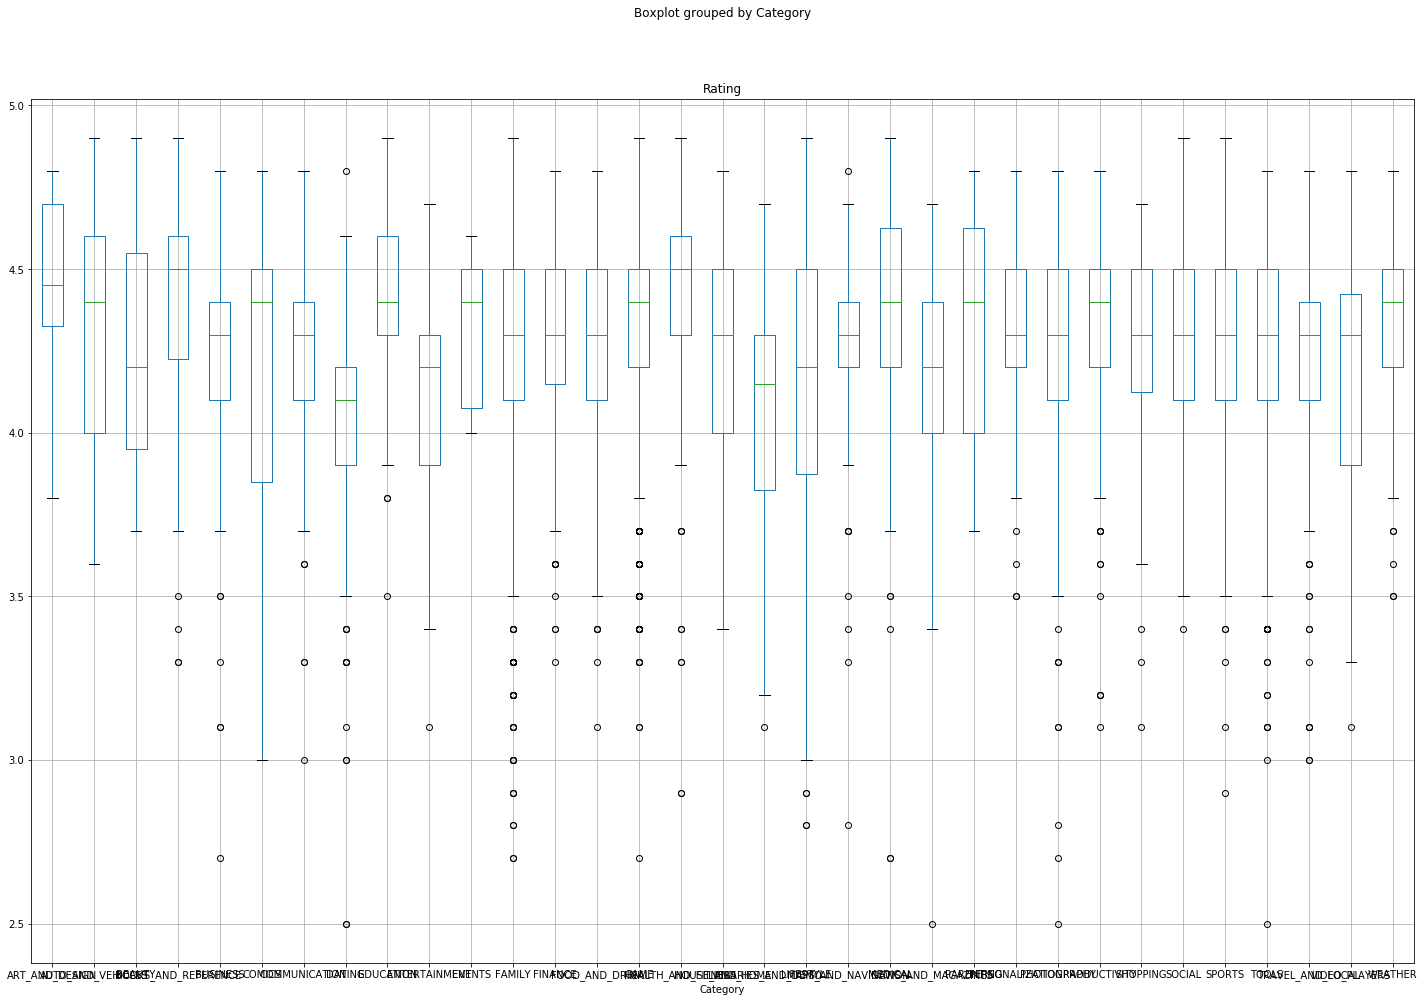

In [28]:
boxplot = df_app.boxplot('Rating', by='Category', figsize=(24,16))
boxplot

### 3.5.2 Hypothesis Writing

Null hypothesis: there is no statistically significant difference on review scores depending App categories.

**Ho: u1 = u2 = u3 = ...**


Alternative hypothesis: there is... difference...

**Ha: there is at least one category making statistically significant difference on reviews.**

**Significance level = 0.05, **

if p-value is less than or equal to the set significance level, the data is considered statistically significant


In [29]:
category = df_app["Category"].unique()
list(category)


['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']


observing the Boxplot we note immediate difference between Categories indexed from 0 to 9,
If there is difference between just 9 types, deduce that ther is difference amongst all types.

In [30]:

a0 = df_app[df_app["Category"] == category[0]]["Rating"]
a1 = df_app[df_app["Category"] == category[1]]["Rating"]
a2 = df_app[df_app["Category"] == category[2]]["Rating"]
a3 = df_app[df_app["Category"] == category[3]]["Rating"]
a4 = df_app[df_app["Category"] == category[4]]["Rating"]
a5 = df_app[df_app["Category"] == category[5]]["Rating"]
a6 = df_app[df_app["Category"] == category[6]]["Rating"]
a7 = df_app[df_app["Category"] == category[7]]["Rating"]
a8 = df_app[df_app["Category"] == category[8]]["Rating"]
a9 = df_app[df_app["Category"] == category[9]]["Rating"]

f_val, p_val = stats.f_oneway(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9) 
print("One-way ANOVA P =", p_val)  

if p_val <= 0.05:
    print("we can claim with high confidence that the rating means of review scores of all different App categories are significantly different.")
else:
    print("We cannot reject the null hypothesis, concluding there isnt't significant difference on review scores between App categories at 0.05 significance level.")


One-way ANOVA P = 1.2846287844749457e-29
we can claim with high confidence that the rating means of review scores of all different App categories are significantly different.


# Helpful packages to learn - Pandas, NumPy, SciPy, Math, Matplotlib, etc...

In [31]:
df_app.shape[0]

5885